<a href="https://colab.research.google.com/github/sharvanitamaskar/Principle-Component-Analysis-using-Differential-Privacy/blob/main/PrivatePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving u.data to u.data


In [3]:
df = pd.read_csv("u.data",sep='\t', header=None)

In [4]:
df.head(15)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [5]:
#preprocess
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df = df.astype({
    'UserID': 'int',
    'MovieID': 'int',
    'Rating': 'int',
    'Timestamp': 'int'
})

print(df)

       UserID  MovieID  Rating  Timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


In [6]:
df['UserID'].unique()

array([196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286, 200,
       210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,  38,
       102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,   7,
        10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,  25,
        59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189, 243,
        92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,  28,
       135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,  94,
       128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85, 213,
       121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26, 130,
       256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272, 151,
        54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192, 100,
       307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,  33,
       154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104, 240,
       144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 236, 26

In [7]:
len(df['UserID'].unique())
# we have 953 uniqiue users whose uder ID ranges from 1->943

943

In [8]:
df['MovieID'].unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641])

In [10]:
len(df['MovieID'].unique())
#each user has voted for atleast 20 movies

1682

In [11]:
df['UserID'].isnull().sum()
#check for nulls

0

In [12]:
df['MovieID'].isnull().sum()
#no null nulls present

0

In [13]:
df['Rating'].min()

1

In [14]:
df['Rating'].max()

5

In [15]:
df.UserID = df.UserID.astype('category').cat.codes.values
df.MovieID = df.MovieID.astype('category').cat.codes.values

In [16]:
df['UserID'].value_counts(ascending=True)

UserID
363     20
823     20
635     20
142     20
630     20
      ... 
275    518
449    540
12     636
654    685
404    737
Name: count, Length: 943, dtype: int64

In [17]:
df['MovieID'].unique()

array([ 241,  301,  376, ..., 1636, 1629, 1640], dtype=int16)

In [18]:
index=list(df['UserID'].unique())
columns=list(df['MovieID'].unique())
index=sorted(index)
columns=sorted(columns)

util_df=pd.pivot_table(data=df,values='Rating',index='UserID',columns='MovieID')

In [19]:
util_df
#nulls show the movies unrated by users

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
util_df=util_df.fillna(0)

In [21]:
util_df

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
class MatrixDataLoader:
  def __init__(self):
        self.A = None
  def load_dataset(self, df):
        self.A = df.values
  def generate_gaussian_matrix(self, rows, columns, mean=0, std_dev=1):
    """Generate a matrix with Gaussian distributed values."""
    self.A = np.random.normal(mean, std_dev, (rows, columns))

loader = MatrixDataLoader()


In [23]:
loader.load_dataset(util_df)
print("Dataset loaded into matrix A:\n", loader.A)

Dataset loaded into matrix A:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [ ]:
loader.generate_gaussian_matrix(rows=100, columns=100, mean=0, std_dev=1)
print("Synthetic Gaussian matrix A:\n", loader.A)

Synthetic Gaussian matrix A:
 [[ 1.30161485 -2.05649071  0.54840569 ... -0.19273049 -0.92681849
   0.2659865 ]
 [ 0.90453499 -0.4290323   0.2258837  ...  2.10183494  0.43696335
  -0.18018272]
 [-0.01054744 -0.68855012 -0.84866683 ...  0.60371543 -0.08064109
  -1.51766113]
 ...
 [ 0.59237282  0.9959816  -0.6172319  ...  0.81995347 -0.68964746
   2.86860884]
 [-0.28951424 -0.01960394  0.48100577 ... -1.17939832  0.31433968
  -2.34327467]
 [ 0.60080232 -1.80601908  1.21534688 ...  1.29667471  1.72027749
   0.72095569]]


In [24]:
Ag=loader.A

In [25]:
U, S, VT = np.linalg.svd(np.dot(Ag.T,Ag))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of Ag
#square roots of the eigenvalues AgAg(t)
print("VT:\n", VT) #contains the right singular vectors of Ag
#captures features and pattersn of Ag

U:
 [[-9.59509371e-02  8.72397853e-02  1.69737618e-02 ... -5.53573924e-20
  -3.24584870e-19 -4.42647285e-19]
 [-3.51795155e-02  7.02505798e-03  6.25039193e-02 ... -6.02809101e-20
   1.57802582e-19 -3.94470036e-19]
 [-1.99288117e-02  2.86181725e-02  1.16405039e-02 ...  1.23525095e-19
  -3.53491761e-20 -4.12546605e-19]
 ...
 [-3.03747116e-05  4.48134760e-04 -5.33024145e-04 ... -2.19315423e-17
   2.73881426e-16  4.58708498e-16]
 [-3.31055915e-04 -1.05231342e-04  4.54336533e-04 ... -1.12492842e-17
   1.68595804e-16  2.77105146e-16]
 [-3.16852950e-04 -2.03151884e-04  2.61400068e-04 ...  8.17075339e-18
  -9.33176522e-17 -1.59007637e-16]]
Singular Values: [4.10411438e+05 5.99448362e+04 4.74569776e+04 ... 4.01028808e-11
 4.01028808e-11 4.01028808e-11]
VT:
 [[-9.59509371e-02 -3.51795155e-02 -1.99288117e-02 ... -3.03747116e-05
  -3.31055915e-04 -3.16852950e-04]
 [ 8.72397853e-02  7.02505798e-03  2.86181725e-02 ...  4.48134760e-04
  -1.05231342e-04 -2.03151884e-04]
 [ 1.69737618e-02  6.25039193e-

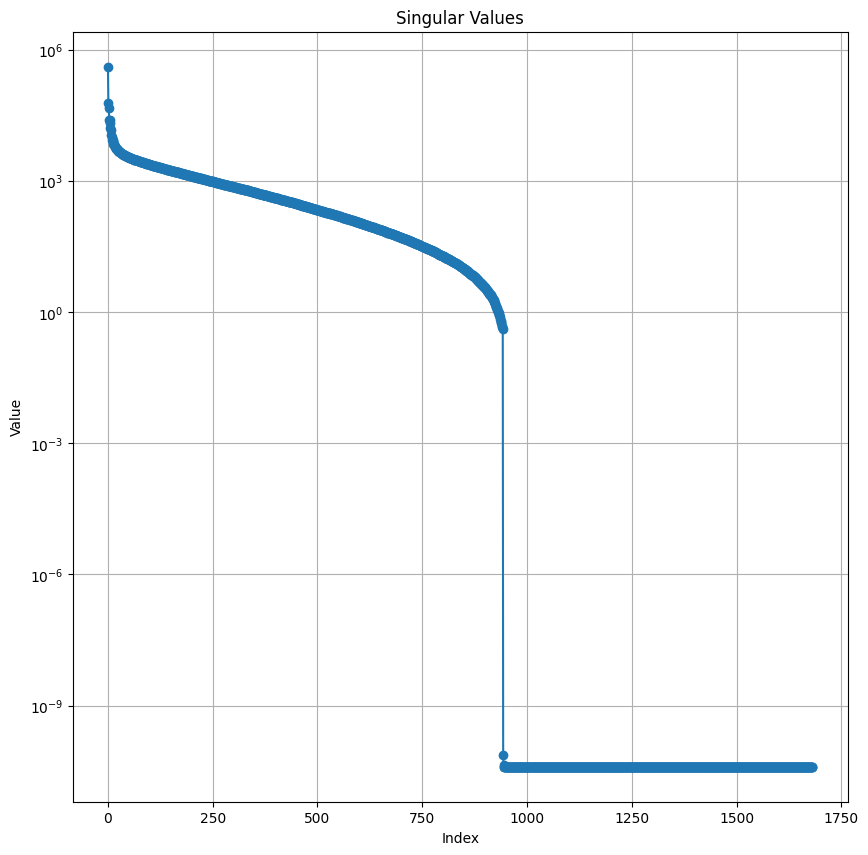

In [26]:
#output/plot separet singular values for movie lens

import matplotlib.pyplot as plt
# plotting the singular values
plt.figure(figsize=(10, 10))
plt.plot(S, marker='o')
plt.title('Singular Values')
plt.xlabel('Index') #gives position of each singular value in the Σ matrix, starting from 0
plt.ylabel('Value') #magnitude of each singular value on a logarithmic scale
plt.yscale('log')
# log scale to see the drop off graph clearly
plt.grid(True)
plt.show()

In [27]:
k_values = range(1, 11, 1)  # values of k to iterate over
approximations = []  # store the rank-k approximations

for k in k_values:
    if k == 0: continue
    U_k = U[:, :k]  # get the first k columns of U
    S_k_diag = np.diag(S[:k])  # create diagonal matrix from the first k singular values
    VT_k = VT[:k, :]  # get the first k rows of VT

    # calculate the rank-k approximation
    A_k = np.dot(U_k, np.dot(S_k_diag, VT_k))

    approximations.append(A_k)
    print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k)

Rank-1 Approximation of Ag^TAg:
 [[3.77848669e+03 1.38534688e+03 7.84783891e+02 ... 1.19613676e+00
  1.30367708e+01 1.24774671e+01]
 [1.38534688e+03 5.07924503e+02 2.87733689e+02 ... 4.38552380e-01
  4.77981032e+00 4.57474684e+00]
 [7.84783891e+02 2.87733689e+02 1.62997995e+02 ... 2.48435138e-01
  2.70771039e+00 2.59154416e+00]
 ...
 [1.19613676e+00 4.38552380e-01 2.48435138e-01 ... 3.78655074e-04
  4.12698576e-03 3.94992977e-03]
 [1.30367708e+01 4.77981032e+00 2.70771039e+00 ... 4.12698576e-03
  4.49802806e-02 4.30505360e-02]
 [1.24774671e+01 4.57474684e+00 2.59154416e+00 ... 3.94992977e-03
  4.30505360e-02 4.12035814e-02]]
Rank-2 Approximation of Ag^TAg:
 [[ 4.23471366e+03  1.42208494e+03  9.34444760e+02 ...  3.53969094e+00
   1.24864556e+01  1.14150691e+01]
 [ 1.42208494e+03  5.10882867e+02  2.99785257e+02 ...  6.27269075e-01
   4.73549572e+00  4.48919634e+00]
 [ 9.34444760e+02  2.99785257e+02  2.12092804e+02 ...  1.01721554e+00
   2.52718479e+00  2.24303474e+00]
 ...
 [ 3.53969094e

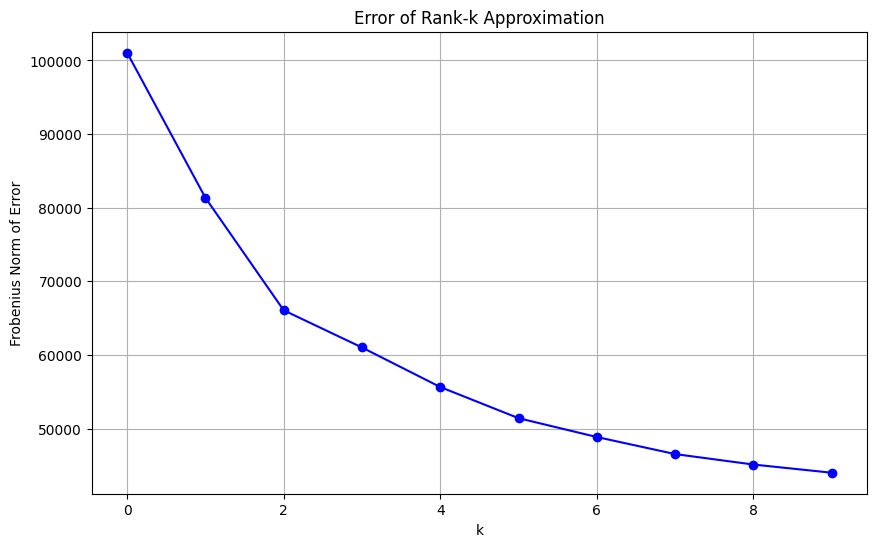

In [28]:
Ag_T_Ag = np.dot(Ag.T, Ag)

# Frobenius norm of the error for each approximation
errors = [np.linalg.norm(Ag_T_Ag - A_k, 'fro') for A_k in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')  # Skipping the first k=0 as it's not used
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [29]:
noise_mean = 0  #mean of the Gaussian noise
noise_std_dev = 50  #std deviation of the Gaussian noise
rows, columns = np.dot(Ag.T,Ag).shape #Shape of Ag
noise = np.random.normal(noise_mean, noise_std_dev, (rows, columns))
#generating Gaussian noise with the same shape
Ag_noisy = np.dot(Ag.T,Ag) + noise #adding the noise
print("Rank-k Approximation of AgAg^T with Gaussian Noise:\n", Ag_noisy)

Rank-k Approximation of AgAg^T with Gaussian Noise:
 [[ 7.21644167e+03  1.26884351e+03  9.62855263e+02 ...  5.51107386e+01
  -5.60136179e+01  5.27501501e+01]
 [ 1.38454991e+03  1.54698267e+03  3.88651736e+02 ...  1.02091875e+02
   9.10762970e+01  1.06339554e+02]
 [ 1.00054100e+03  3.50170280e+02  1.01019586e+03 ... -9.20817228e+01
  -4.50613567e+01  4.90058855e+01]
 ...
 [ 4.50260588e+00  5.32033507e+01 -3.39315142e+01 ...  1.23712977e+02
  -3.35683534e+00  9.96299213e+01]
 [ 6.42851247e+01 -5.80097551e+01  3.79743961e+01 ... -2.98037737e+01
   1.59205082e+01 -1.65404875e+01]
 [-9.12548467e+01  2.34892273e+00 -2.34905861e+01 ...  2.52995320e+00
  -5.40301571e+01  1.95635067e+01]]


In [34]:
U_noisy, S_noisy, VT_noisy = np.linalg.svd(Ag_noisy)
print("U_noisy:\n", U_noisy)
print("Singular Values:", S_noisy)
print("VT_noisy:\n", VT_noisy)

U_noisy:
 [[-9.59563389e-02  8.62250670e-02 -1.72205094e-02 ...  1.78390768e-02
  -7.36936337e-03  1.40715171e-02]
 [-3.53214297e-02  6.17380182e-03 -6.24215453e-02 ... -6.70247469e-03
   3.99841116e-03  1.04009803e-03]
 [-2.00420551e-02  2.97133888e-02 -1.31624820e-02 ... -7.92509614e-03
  -1.58882378e-02  1.78351590e-02]
 ...
 [-4.83868741e-05  7.26986194e-04 -8.96226873e-04 ... -2.37529887e-02
  -5.10968517e-02  1.42168069e-02]
 [-4.75597404e-04  1.21685551e-03  8.68061123e-04 ... -1.58202188e-02
   5.19408511e-02 -2.77483810e-02]
 [-7.17451743e-05  2.01062099e-04 -2.75707613e-04 ... -5.20009959e-02
   4.71208172e-02 -3.44554356e-03]]
Singular Values: [4.10447135e+05 6.01154512e+04 4.75740736e+04 ... 3.58900618e+00
 2.43192801e+00 3.81101916e-01]
VT_noisy:
 [[-9.60466890e-02 -3.49363291e-02 -1.99794091e-02 ... -7.31437078e-05
  -4.97265099e-04 -5.45529437e-04]
 [ 8.68375695e-02  7.12711721e-03  2.82301855e-02 ...  1.67256922e-03
   6.36479355e-04 -1.69854239e-03]
 [-1.63972983e-02 -

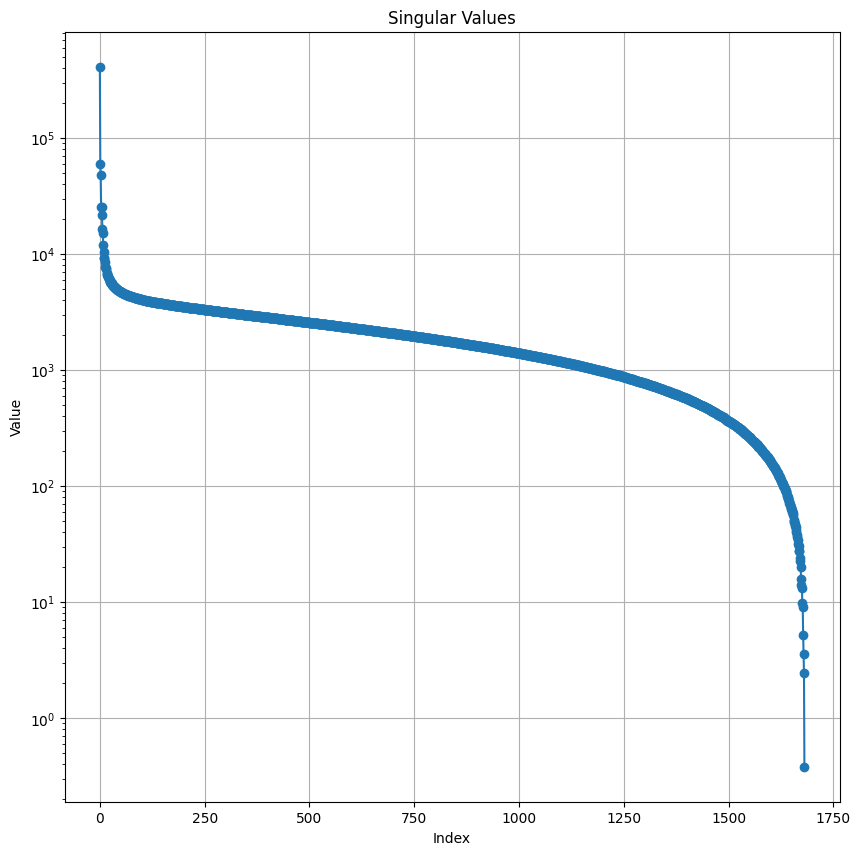

In [35]:
plt.figure(figsize=(10, 10))
plt.plot(S_noisy, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.grid(True)
plt.show()

In [36]:
k_values = range(0, 1001, 100)
approximations = []

for k in k_values:
      U_k_noisy = U_noisy[:, :k]
      S_k_diag_noisy = np.diag(S_noisy[:k])
      VT_k_noisy = VT_noisy[:k, :]

      A_k_noisy = np.dot(U_k_noisy, np.dot(S_k_diag_noisy, VT_k_noisy)) #reconstruction

      approximations.append(A_k_noisy)

      print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k_noisy)


Rank-0 Approximation of Ag^TAg:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Rank-100 Approximation of Ag^TAg:
 [[ 6.43049992e+03  1.25673641e+03  9.07621068e+02 ... -9.95575075e-01
  -7.48416780e+01  8.07097929e+01]
 [ 1.32314656e+03  1.06312030e+03  3.16840471e+02 ...  1.96764818e+00
  -1.23868393e+01  2.90030968e+01]
 [ 9.59933595e+02  3.42210779e+02  6.06839118e+02 ... -2.45308177e+01
  -2.11761766e+01  1.92025643e+01]
 ...
 [-1.01038139e+01  1.76334755e+01 -2.91152347e+01 ...  1.27515992e+01
   7.39644805e+00  1.48094550e+01]
 [ 8.18501780e+01 -1.00292180e+01  2.12249107e+01 ... -3.87685362e+00
  -7.30209968e+00  2.32939979e+00]
 [ 2.41804768e+00 -8.31359109e+00 -1.13729165e+01 ...  1.70162537e+01
   9.97757578e+00  1.22198863e+00]]
Rank-200 Approximation of Ag^TAg:
 [[ 6.70811410e+03  1.22109869e+03  9.31651677e+02 ...  8.66483991e+00
  -8.34462752e+01  6.32077903e+01]


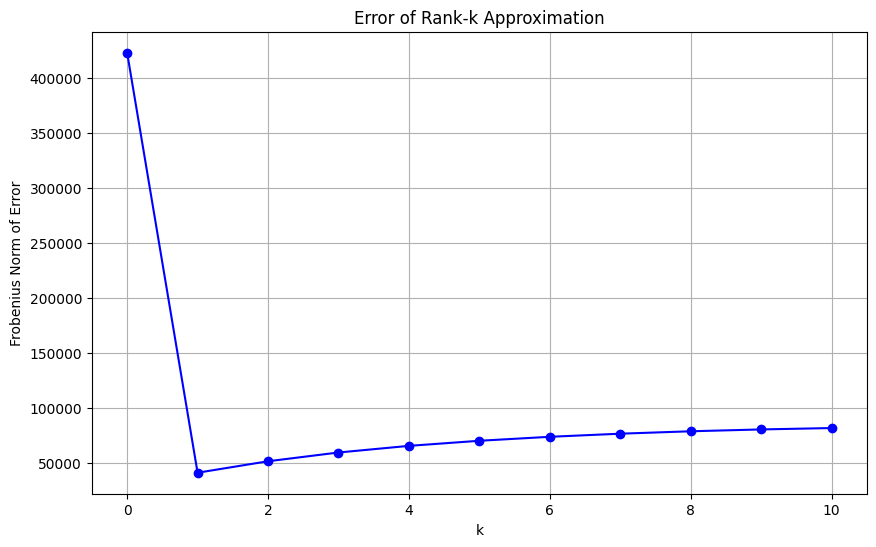

In [37]:
#errors = [np.linalg.norm(np.dot(Ag.T,Ag)-A_k_noisy, 'fro') for A_k_noisy in approximations]
errors = [np.linalg.norm(np.dot(Ag.T,Ag) - approx, 'fro') for approx in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [38]:
mse = np.mean((A_k_noisy - A_k) ** 2)
print("MSE", mse)

MSE 3031.231539553596
